Let us import all the libraries and packages needed to build this machine-learning algorithm.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics 

import warnings 
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
# To fetch financial data
import yfinance as yf

# Fetch data
df= yf.download('AAPL', start='2010-1-1', end='2017-12-31')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461975,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [3]:
df.shape

(2013, 6)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03
mean,22.070710,22.256630,21.868497,22.068535,19.695690,3.434502e+08
std,8.946542,8.999490,8.894074,8.950660,8.654345,2.426417e+08
min,6.870357,7.000000,6.794643,6.858929,5.798901,4.590360e+07
25%,14.465357,14.616071,14.329286,14.480714,12.332438,1.569304e+08
50%,21.448570,21.674999,21.259287,21.535713,18.352057,2.827904e+08
75%,28.262501,28.547501,27.967501,28.262501,25.736883,4.536056e+08
max,43.777500,44.299999,43.715000,44.105000,41.596748,1.880998e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2010-01-04 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2013 non-null   float64
 1   High       2013 non-null   float64
 2   Low        2013 non-null   float64
 3   Close      2013 non-null   float64
 4   Adj Close  2013 non-null   float64
 5   Volume     2013 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


Exploratory Data Analysis

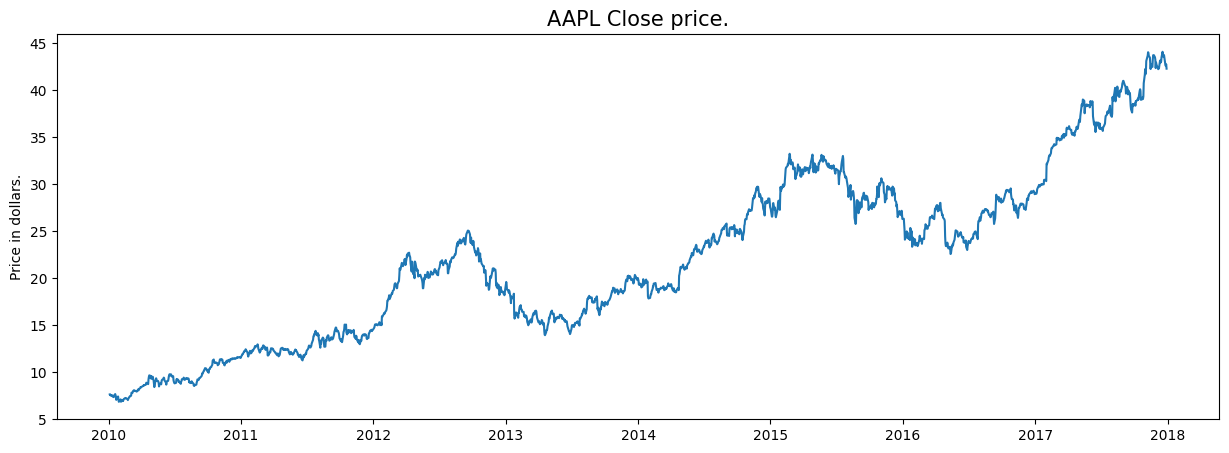

In [6]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('AAPL Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

let’s check for the null values if any are present in the data frame.

In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

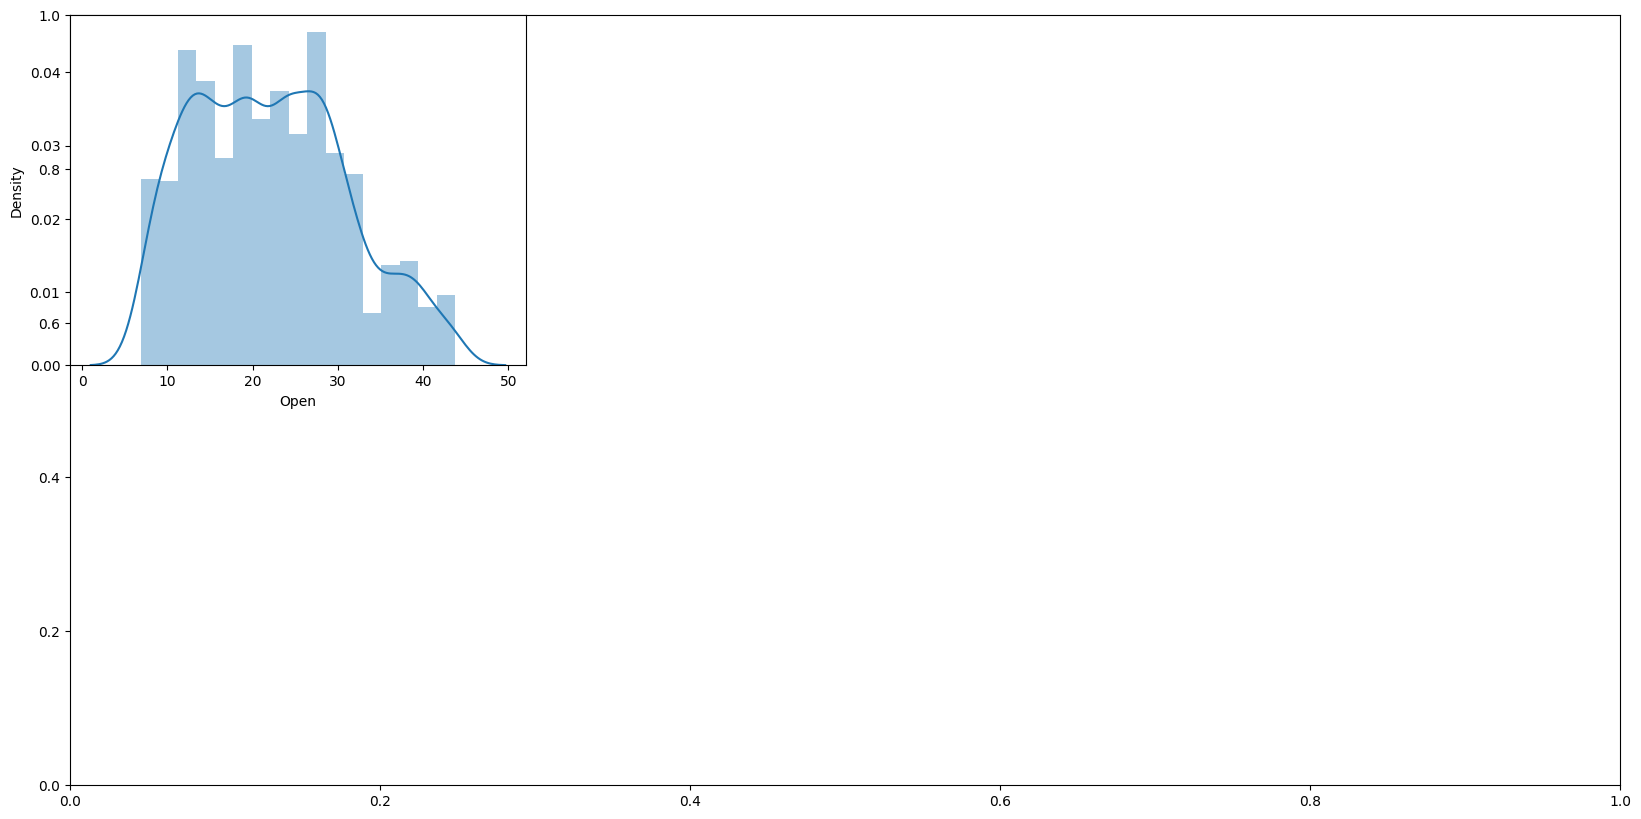

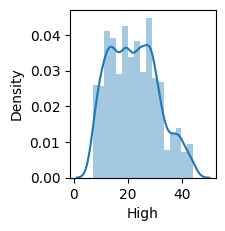

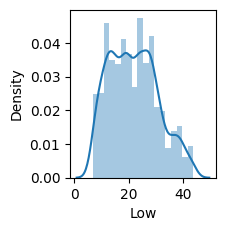

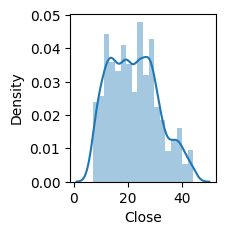

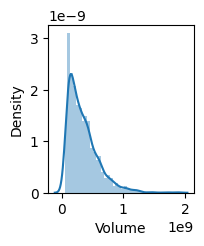

In [8]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 

plt.subplots(figsize=(20,10)) 

for i, col in enumerate(features):
    plt.subplot(2,3,i+1) 
    sb.distplot(df[col]) 
    plt.show()


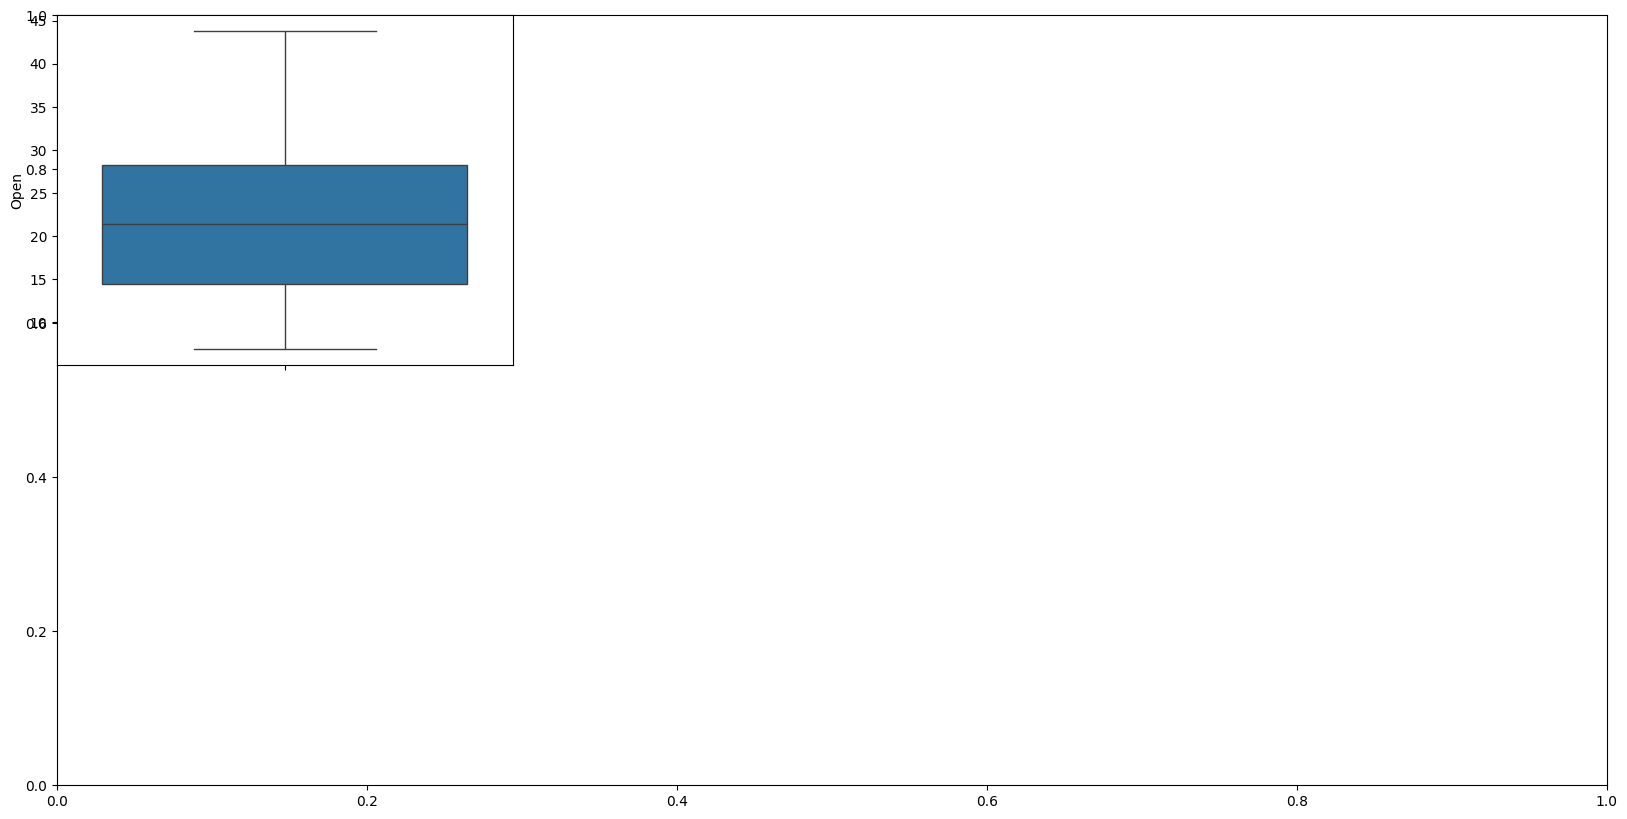

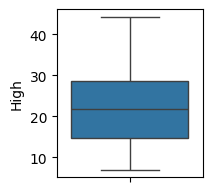

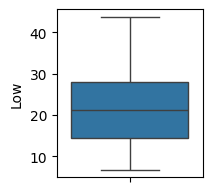

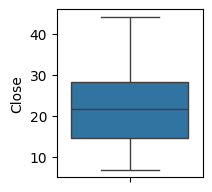

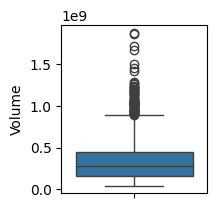

In [9]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.boxplot(df[col]) 
    plt.show()


Data Splitting and Normalization

In [10]:
features = df[['Open', 'High',	'Low', 'Adj Close', 'Volume']] 
target = df['Close'] 

scaler = RobustScaler() 
features = scaler.fit_transform(features) 

X_train, X_valid, Y_train, Y_valid = train_test_split( 
	features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(1811, 5) (202, 5)


Model Development and Evaluation

In [11]:
models = [LinearRegression(), SVR(), XGBRegressor()] 

for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.mean_squared_error( 
    Y_train, models[i].predict(X_train))) 
  print('Validation Accuracy : ', metrics.mean_squared_error( 
    Y_valid, models[i].predict(X_valid))) 
  print()


LinearRegression() : 
Training Accuracy :  0.012801598711479645
Validation Accuracy :  0.011088626178563439

SVR() : 
Training Accuracy :  0.17213966311005727
Validation Accuracy :  0.27955477497173603

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.0018785699810711899
Vali